In [1]:
#importing modules
import psycopg2
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from Password import password


In [2]:
#used module psycopg2 not alchemy as the other module did not work. Thus used a slightly different approach

conn = psycopg2.connect(host="localhost", port = 5432, database="employees_db", user="postgres", password=f'{password}')



In [3]:
#Salaries table
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [4]:
salaries_2=pd.DataFrame(salaries["salary"])

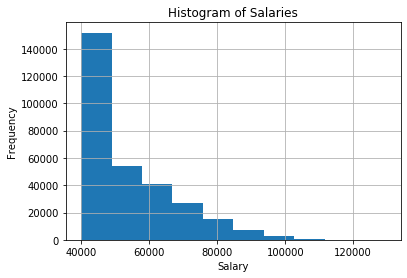

In [5]:
#Histogram of salaries
hist = salaries_2.hist(bins=10)
pl.title("Histogram of Salaries")
pl.xlabel("Salary")
pl.ylabel("Frequency")
plt.savefig('Histogram of Salaries')


Clerly, most employees earn between 40-45 thousand per year. The data seems to have a very strong positive skew. Usually wages in a company are more normally distributed, so this histogram is somewhat suspicious and could be because the data is fabricated.

In [6]:
#importing employees database 
employees=pd.read_sql("SELECT * FROM employees", conn)
titles=pd.read_sql("SELECT * FROM titles", conn)


In [7]:
#Merging the two databases together 
merge_employees = pd.merge(employees, salaries, on="emp_no")
merge_employees.count()
#merging the titles databse to get all the names for the titles
merge_employees.rename(columns = {'emp_title_id':'title_id'}, inplace = True)
merge_employees = pd.merge(merge_employees, titles, on="title_id")
#checking to see if there are any null values 
merge_employees.count()
#no null values are here and therefore do not need to fill any nul lvalues


emp_no        300024
title_id      300024
birth_date    300024
first_name    300024
last_name     300024
sex           300024
hire_date     300024
salary        300024
title         300024
dtype: int64

In [8]:
#cleaning the dataframe, dropping all null rows


grouped_title_salary=merge_employees.groupby(['title']) 
salary_emp=grouped_title_salary["salary"].mean()


In [9]:
salary_emp=pd.DataFrame(salary_emp)

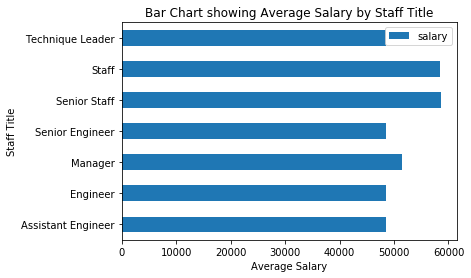

In [10]:
#Graph Average salary bar chart 
count_chart = salary_emp.plot(kind='barh')
count_chart.set_xlabel("Average Salary")
count_chart.set_ylabel("Staff Title")
count_chart.set_title("Bar Chart showing Average Salary by Staff Title")
plt.savefig('Bar_chart_avgsalary_title')



The average salary for Assistant Engineer, Senior Engineer and Engineer is exactly the same which is unlikely. This is because it would be expected that the Assistant Engineer would earn less than the Engineer and that the Engineer woudl earn less than the Senior Engineer. Thus, this is somewhat suspicious and looks like the data has been fabricated. 